In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install keras
from numpy.linalg import inv
from tensorflow.keras.layers import Dense
from collections import defaultdict
from keras.layers import Dense, Activation
from keras.models import Sequential, Model


In [42]:
train_data=pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train_data=train_data.replace(['female','male'],[0,1])
train_data=train_data.replace(['S','C','Q'],[0,1,2])
tarin_data=train_data.fillna(0,inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0.0


In [44]:
Y_train=train_data[['Survived']]
X_train=train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train=np.array(Y_train)
X_train=np.array(X_train)

In [45]:
test_data = pd.read_csv('test.csv')
test_data = test_data.replace(['female', 'male'], [0, 1])
test_data = test_data.replace(['S', 'C', 'Q'], [0, 1, 2])
test_data = test_data.fillna(0)
X_test = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.read_csv('gender_submission.csv')
Y_test = test[['Survived']]

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [49]:
model=tf.keras.models.Sequential([
                               tf.keras.layers.Dense(16,activation='relu'),
                               tf.keras.layers.Dense(16,activation='relu'),
                               tf.keras.layers.Dense(8,activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')


])

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.mean_absolute_error,metrics=['accuracy'])

In [51]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
output=model.fit(X_train,Y_train,epochs=200)

(891, 7) (891, 1)
(418, 7) (418, 1)
Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.5751 - accuracy: 0.3951
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.5836
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3629 - accuracy: 0.6936
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.6970
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.6981
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.7015
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.7003
Epoch 8/200
28/28 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.7015
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.7071
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss:

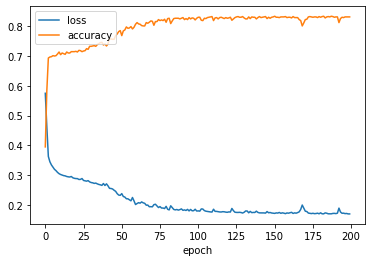

In [52]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [56]:
model.evaluate(X_test,Y_test)
pred=[[1,0,34,1,0,54.3900,2]]
y_pred=np.argmax(model.predict(pred))
print(y_pred)

14/14 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9234
0


In [57]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [58]:
class KNN:
  
  def __init__(self,k):
    self.k=k

  def fit(self,X_train,Y_train):
    self.X_train=X_train
    self.Y_train=Y_train

    self.num_of_class=len(np.unique(Y_train))
    #print(self.num_of_class)

  def nearNeighbors(self,X_test):
    distance=np.sqrt(np.sum((X_test-self.X_train)**2,axis=1))
    near_neighbors=np.argsort(distance)[0:self.k]
    return near_neighbors


  def predict(self,X_test):
    near_neighbors=self.nearNeighbors(X_test)
    #print(near_neighbors)
    y_pred=np.argmax(np.bincount(self.Y_train[near_neighbors])) 
    return y_pred

  def evaluate(self,X_test,Y_test):
    num_of_correct_pred=0
    self.X_test=X_test
    self.Y_test=Y_test
    y=[]
    for i in range(X_test.shape[0]):
      #print(X_test.shape[0],X_test[i])
      y.append(self.predict(X_test[i,:]))
    for i in range(len(y)):
      if(Y_test[i]==y[i]):
        num_of_correct_pred +=1
        #print(num_of_correct_pred)
    return (num_of_correct_pred /len(Y_test))*100

In [59]:
print(Y_test.shape)
print(Y_train.shape)
Y_train=Y_train.reshape(-1)
Y_test=Y_test.reshape(-1)
print(Y_train.shape,Y_test.shape)

knn=KNN(5)
knn.fit(X_train,Y_train)
accuracy=knn.evaluate(X_test,Y_test)
print("accuracy :",accuracy)

(418, 1)
(891, 1)
(891,) (418,)
accuracy : 65.55023923444976


In [60]:
class Adaline:
  def __init__(self):
    pass

  def fit(self,X_train,Y_train):
    self.w=np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),np.matmul(X_train.T,Y_train)) 
    
  def predict(self,X_test):
    y_pred=[]

    Y_pred=np.matmul(X_test,self.w)  
    for i in range(len(Y_pred)):
      if((Y_pred[i]-Y_test[i])**2)<= 0.5:
        y_pred.append(0)
      elif((Y_pred[i]-Y_test[i])**2)> 0.5:
        y_pred.append(1)
    return y_pred    

  def evaluate(self,y_pred,Y_test):
    num_of_correct_pred=0
    y=[]

    for i in range(len(Y_test)):
      if(Y_test[i]==y_pred[i]):
        num_of_correct_pred+=1
    accuracy=(num_of_correct_pred/len(Y_test))*100
    return accuracy

In [61]:
adaline=Adaline()
adaline.fit(X_train,Y_train)
y_pred=adaline.predict(X_test)
accuracy=adaline.evaluate(y_pred,Y_test)
print("accuracy =",accuracy)

accuracy = 62.67942583732058


In [63]:
class Perceptron:
  def __init__(self):
    pass

  def fit(self,X_train,Y_train):

    errors=[]
    iteration=[]
    lr=0.001
    
    N=X_train.shape[0]
    self.w=np.random.rand(7,1)
    self.b=np.random.rand(1,1)

    for j in range(N):
        
      y_pred=np.matmul(X_train[j],self.w)+self.b
      e=Y_train[j]-y_pred
      
      self.w+=(lr*(X_train[j].T*e).T)
      self.b+=lr*e
      
       
      Y_pred=np.matmul(X_train,self.w)+self.b
     

  def predict(self,X_test):
    Y_test_pred=np.matmul(X_train,self.w)+self.b
    Y_test_pred[Y_test_pred>0.5]=1
    Y_test_pred[Y_test_pred<=0.5]=0
    #print(Y_test_pred)
    return Y_test_pred

 
  def evaluate(self,X_train,X_test):
    Y_test_pred=np.matmul(X_test,self.w)+self.b
    Y_test_pred[Y_test_pred>0.5]=1
    Y_test_pred[Y_test_pred<=0.5]=0

    num_of_correct_pred=0

    for i in range(len(Y_test)):
      if(Y_test_pred[i]==Y_test[i]):
        num_of_correct_pred+=1
    accuracy=num_of_correct_pred/len(Y_test)*100
    return accuracy

In [64]:
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_test_pred=perceptron.predict(X_test)

accuracy=perceptron.evaluate(X_train,X_test)
print('accuracy ',accuracy)

accuracy  61.961722488038276
